In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from params import *
import tqdm
import ghibtools as gh
import seaborn as sns
import pingouin as pg
%matplotlib inline

In [3]:
print(patient)

P10


## SAVING CHOSE

In [4]:
save_cycles_with_spindle = False

## PARAMS

In [5]:
nbins = 2

## LOAD RESP FEATURES & SPINDLES FEATURES

In [6]:
def load_df(patient , stage_to_study=stage_to_study):
    spindle_file = f'../df_analyse/spindles_{patient}.xlsx'
    rsp_cycle_file = f'../df_analyse/resp_features_new_{patient}.xlsx'
    df_cycles = pd.read_excel(rsp_cycle_file, index_col = 0)
    spindles = pd.read_excel(spindle_file).drop(columns = 'Unnamed: 0')
    spindles = spindles[spindles['stage'] == stage_to_study]
    end_cycles = []
    for cycle in range(df_cycles.shape[0]):
        end_resp = df_cycles.loc[cycle, 'inspi_time'] + df_cycles.loc[cycle, 'cycle_duration']
        end_cycles.append(end_resp)
    df_cycles['end_time'] = end_cycles
    df_cycles
    
    return df_cycles , spindles

In [7]:
df_cycles , spindles = load_df(patient)

In [8]:
df_cycles

,Unnamed: 0,patient,cycle_num,inspi_index,expi_index,inspi_time,expi_time,cycle_duration,insp_duration,exp_duration,cycle_freq,insp_volume,exp_volume,total_amplitude,insp_amplitude,exp_amplitude,end_time
0,0,P10,0,9,315,0.035156,1.230469,3.218750,1.195312,2.023438,0.310680,70.149251,35.250572,101.332140,70.477427,30.854713,3.253906
1,1,P10,1,833,1149,3.253906,4.488281,3.484375,1.234375,2.250000,0.286996,76.714018,41.101259,109.483597,78.546267,30.937330,6.738281
2,2,P10,2,1725,2081,6.738281,8.128906,3.496094,1.390625,2.105469,0.286034,80.284087,37.333431,99.036470,68.051436,30.985034,10.234375
3,3,P10,3,2620,2982,10.234375,11.648438,3.363281,1.414062,1.949219,0.297329,73.256394,33.306419,93.975076,63.056873,30.918203,13.597656
4,4,P10,4,3481,3791,13.597656,14.808594,3.449219,1.210938,2.238281,0.289921,75.739948,40.251144,109.223979,78.179055,31.044925,17.046875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,1687,P10,1687,1813931,1814254,7085.667969,7086.929688,2.914062,1.261719,1.652344,0.343164,79.005229,7.133767,112.294064,81.305451,30.988612,7088.582031
1685,1688,P10,1688,1814677,1814990,7088.582031,7089.804688,3.496094,1.222656,2.273438,0.286034,80.071477,18.720356,114.306694,83.273309,31.033386,7092.078125
1686,1689,P10,1689,1815572,1815900,7092.078125,7093.359375,3.144531,1.281250,1.863281,0.318012,88.749161,10.335936,125.269604,94.430902,30.838703,7095.222656
1687,1690,P10,1690,1816377,1816681,7095.222656,7096.410156,3.453125,1.187500,2.265625,0.289593,84.251904,17.570151,119.336883,88.696413,30.640469,7098.675781


In [9]:
spindles

,patient,stage,Start,Peak,End,Duration,Amplitude,RMS,AbsPower,RelPower,Frequency,Oscillations,Symmetry,Channel,IdxChannel
180,P10,N2,4.253906,4.722656,5.363281,1.109375,48.304384,9.593304,1.896777,0.420378,12.280584,13,0.421053,Fp2-C4,0
181,P10,N2,23.078125,23.281250,23.609375,0.531250,28.306916,7.323837,1.813016,0.390438,12.538347,7,0.379562,Fp2-C4,0
182,P10,N2,33.667969,33.980469,34.273438,0.605469,36.242581,8.118359,1.796433,0.261610,11.926052,7,0.512821,Fp2-C4,0
183,P10,N2,51.339844,51.832031,52.167969,0.828125,28.222252,6.654932,1.767579,0.464829,12.585936,11,0.591549,Fp2-C4,0
184,P10,N2,117.804688,118.375000,118.816406,1.011719,53.490489,11.261966,1.922048,0.320993,12.951341,13,0.561538,Fp2-C4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,P10,N2,7449.910156,7450.089844,7450.464844,0.554688,31.118556,6.772215,1.478077,0.236618,13.017753,6,0.321678,T3-O1,7
2848,P10,N2,7509.289062,7509.449219,7509.812500,0.523438,25.437377,5.836279,1.679451,0.396657,13.624334,7,0.303704,T3-O1,7
2849,P10,N2,8001.078125,8001.460938,8001.707031,0.628906,31.801027,7.156477,1.765386,0.385709,13.726640,8,0.604938,T3-O1,7
2850,P10,N2,8584.031250,8584.339844,8584.675781,0.644531,34.620598,8.311678,1.893966,0.429671,13.607499,9,0.475904,T3-O1,7


## COMPUTE WHICH CYCLE CONTAINS SPINDLES

In [10]:
def which_cycle_find_spindle(spindles = spindles, df_cycles = df_cycles, patient=patient):
    spindles_times = spindles['Peak'].values

    count = []

    for cycle in range(df_cycles.shape[0]):

        start = df_cycles.loc[cycle,'inspi_time']
        stop = df_cycles.loc[cycle,'end_time']
        
        for spindle_time in spindles_times:
            if spindle_time >= start and spindle_time < stop:
                count.append(cycle)
    cycles_with_spindle = pd.Series(count).unique()

    return cycles_with_spindle

In [11]:
cycles_spindled = which_cycle_find_spindle(spindles = spindles, df_cycles = df_cycles)

In [12]:
if save_cycles_with_spindle:
    print(f'saving {patient}')
    np.save(f'../df_analyse/cycles_spindled_{patient}', cycles_spindled)

In [13]:
cycles_spindled.size

755

## COMPUTE WHICH RESP PHASE CONTAINS SPINDLES

In [14]:
def count_spindles_phase_resp(nbins, patient, spindles = spindles, df_cycles = df_cycles, cycle_spindled = cycles_spindled, show=False):
    spindles_times = spindles['Peak']
    
    count = []

    for cycle in cycle_spindled:
        
        start = df_cycles.loc[cycle,'inspi_time']
        stop = df_cycles.loc[cycle,'end_time']

        phases_timings = np.linspace(start, stop, nbins + 1)
        
        spindles_of_the_cycle = spindles_times[(spindles_times >= start) & (spindles_times <= stop)].values
        
        for spindle_time in spindles_of_the_cycle:
            for i, phase_start in enumerate(phases_timings):
                if phase_start != phases_timings[-1]:
                    phase_stop = phases_timings[i + 1]
                    if spindle_time >= phase_start and spindle_time < phase_stop:
                        count.append(i)
                        
    phase_count = pd.Series(count).value_counts(normalize = False).reindex(np.arange(0,nbins))
    phase_count = phase_count.to_frame().T
    phase_count.insert(0 , 'norm' , 'no')
    phase_count_norm = pd.Series(count).value_counts(normalize = True).reindex(np.arange(0,nbins))
    phase_count_norm = phase_count_norm.to_frame().T
    phase_count_norm.insert(0 , 'norm' , 'yes')
    
    df_concat = pd.concat([phase_count, phase_count_norm], axis = 0)
    
    df_concat.insert(0 , 'patient', patient)

    return df_concat

In [15]:
count_spindles_phase_resp(nbins, patient)

,patient,norm,0,1
0,P10,no,859.000000,1020.000000
0,P10,yes,0.457158,0.542842


## LOOP ON PATIENTS AND STAGES

In [16]:
def all_in_one(patient, nbins=nbins, stage='N2'):
    df_cycles , spindles = load_df(patient, stage_to_study=stage)
    cycles_spindled = which_cycle_find_spindle(spindles = spindles, df_cycles = df_cycles, patient=patient)
    count = count_spindles_phase_resp(nbins=nbins, patient=patient, spindles = spindles, df_cycles = df_cycles, cycle_spindled = cycles_spindled, show=False)
    count.insert(1 , 'stage' , stage)
    return count

In [17]:
all_in_one(patient='P1',nbins = 2, stage = 'N2')

,patient,stage,norm,0,1
0,P1,N2,no,1028.000000,1171.000000
0,P1,N2,yes,0.467485,0.532515


In [18]:
concat = []
for p in  ['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10']:
    print(p)
    for stage in compute_stages:
        concat.append(all_in_one(patient=p, stage=stage))
df = pd.concat(concat)

P1
P2
P3
P4
P5
P6
P7
P8
P9


/tmp/ipykernel_198917/607658360.py:14: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cycles_with_spindle = pd.Series(count).unique()
/tmp/ipykernel_198917/1370126485.py:22: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  phase_count = pd.Series(count).value_counts(normalize = False).reindex(np.arange(0,nbins))
/tmp/ipykernel_198917/1370126485.py:25: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  phase_count_norm = pd.Series(count).value_counts(normalize = True).reindex(np.arange(0,nbins))


P10


/tmp/ipykernel_198917/607658360.py:14: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cycles_with_spindle = pd.Series(count).unique()
/tmp/ipykernel_198917/1370126485.py:22: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  phase_count = pd.Series(count).value_counts(normalize = False).reindex(np.arange(0,nbins))
/tmp/ipykernel_198917/1370126485.py:25: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  phase_count_norm = pd.Series(count).value_counts(normalize = True).reindex(np.arange(0,nbins))


In [19]:
df

,patient,stage,norm,0,1
0,P1,W,no,25.000000,36.000000
0,P1,W,yes,0.409836,0.590164
0,P1,R,no,NaN,3.000000
0,P1,R,yes,NaN,1.000000
0,P1,N2,no,1028.000000,1171.000000
...,...,...,...,...,...
0,P10,R,yes,0.375000,0.625000
0,P10,N2,no,859.000000,1020.000000
0,P10,N2,yes,0.457158,0.542842
0,P10,N3,no,NaN,NaN


In [24]:
concat = []
for p in  ['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10']:
    print(p)
    for stage in compute_stages:
        concat.append(all_in_one(patient=p,nbins = 3, stage=stage))
df_3 = pd.concat(concat)

P1
P2
P3
P4
P5
P6
P7
P8
P9


/tmp/ipykernel_198917/607658360.py:14: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cycles_with_spindle = pd.Series(count).unique()
/tmp/ipykernel_198917/1370126485.py:22: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  phase_count = pd.Series(count).value_counts(normalize = False).reindex(np.arange(0,nbins))
/tmp/ipykernel_198917/1370126485.py:25: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  phase_count_norm = pd.Series(count).value_counts(normalize = True).reindex(np.arange(0,nbins))


P10


/tmp/ipykernel_198917/607658360.py:14: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cycles_with_spindle = pd.Series(count).unique()
/tmp/ipykernel_198917/1370126485.py:22: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  phase_count = pd.Series(count).value_counts(normalize = False).reindex(np.arange(0,nbins))
/tmp/ipykernel_198917/1370126485.py:25: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  phase_count_norm = pd.Series(count).value_counts(normalize = True).reindex(np.arange(0,nbins))


In [31]:
to_plot_3 = df_3[(df_3['norm'] == 'yes') & (df_3['stage'] == 'N2') ]

<AxesSubplot:xlabel='patient,norm,stage'>

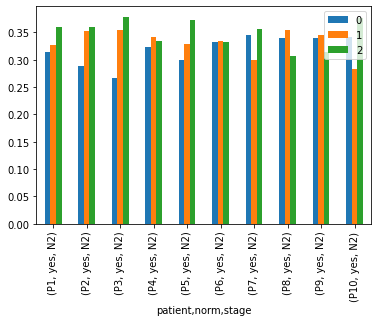

In [42]:
to_plot_3.set_index(['patient','norm','stage']).plot.bar()

In [20]:
def to_tidy(df, nbins=2, indexes = ['patient','stage','norm']):
    df = df.set_index(indexes)
    rows = []
    for patient in patients:
        for stage in compute_stages:
            for norm in ['no','yes']:
                for bin_i in range(nbins):

                    count_bin_i = df.loc[(patient, stage, norm), bin_i]
                    row = [patient, stage, norm, bin_i, count_bin_i]
                    rows.append(row)
                
    df_tidy = pd.DataFrame(rows, columns = ['patient' , 'stage', 'norm', 'phase' , 'count'])
    return df_tidy

df_tidy = to_tidy(df)
df_tidy

,patient,stage,norm,phase,count
0,P1,W,no,0,25.000000
1,P1,W,no,1,36.000000
2,P1,W,yes,0,0.409836
3,P1,W,yes,1,0.590164
4,P1,R,no,0,NaN
...,...,...,...,...,...
155,P10,N2,yes,1,0.542842
156,P10,N3,no,0,NaN
157,P10,N3,no,1,NaN
158,P10,N3,yes,0,NaN


In [21]:
df_tidy.groupby(['stage','norm','phase']).mean()

count
stage norm phase             
N2    no   0      1065.000000
           1      1230.700000
      yes  0         0.467880
           1         0.532120
N3    no   0        17.600000
           1        16.750000
      yes  0         0.398883
           1         0.750698
R     no   0        11.250000
           1        12.400000
      yes  0         0.478024
           1         0.617581
W     no   0        46.200000
           1        47.100000
      yes  0         0.491606
           1         0.508394

In [22]:
df_tidy.groupby(['stage','norm','phase']).std()

count
stage norm phase            
N2    no   0      628.026539
           1      712.710951
      yes  0        0.022772
           1        0.022772
N3    no   0       12.074767
           1       17.621010
      yes  0        0.086560
           1        0.216563
R     no   0       14.577380
           1       16.681327
      yes  0        0.149593
           1        0.240891
W     no   0       31.097696
           1       24.803450
      yes  0        0.093384
           1        0.093384

KeyboardInterrupt: 

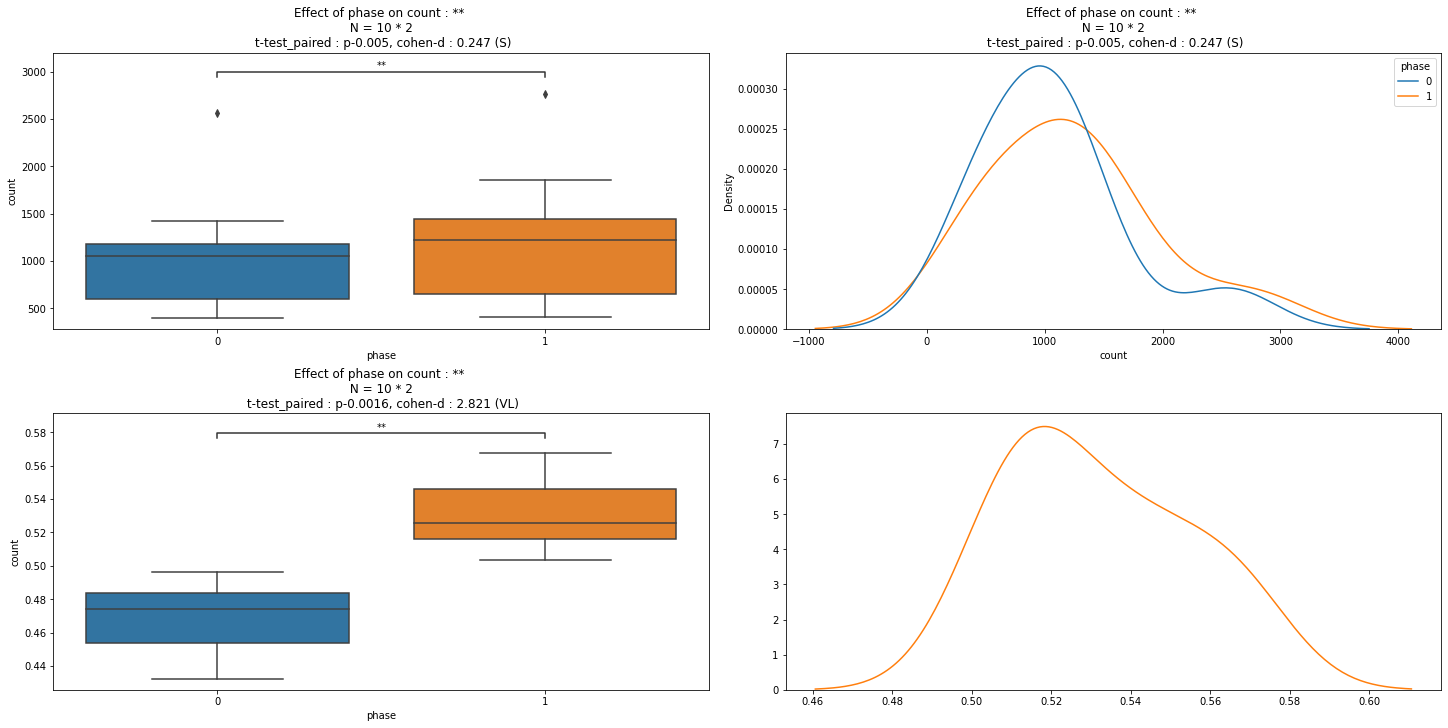

In [23]:
fig ,axs = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10), constrained_layout =True)

for row , norm in enumerate(['no', 'yes']):
    for col, mode in enumerate(['box','distribution']):
        ax = axs[row, col]
        gh.auto_stats(df=df_tidy[(df_tidy['stage'] == 'N2') & (df_tidy['norm'] == norm)] , predictor = 'phase', outcome = 'count' , design = 'within', ax=ax, mode = mode)

In [ ]:
bin_1_prop = df_tidy[(df_tidy['stage'] == 'N2') & (df_tidy['norm'] == 'yes') & (df_tidy['phase'] == 1)]['count'].values
bin_0_prop = df_tidy[(df_tidy['stage'] == 'N2') & (df_tidy['norm'] == 'yes') & (df_tidy['phase'] == 0)]['count'].values

In [ ]:
ttest = pg.ttest(x = bin_1_prop, y = 0.5)
ttest

In [ ]:
pg.ttest(x = bin_0_prop, y = 0.5)

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(data = df_tidy[(df_tidy['stage'] == 'N2') & (df_tidy['norm'] == 'yes')], x='patient', y ='count', hue = 'phase', ax=ax)
p = ttest.loc['T-test', 'p-val'].round(4)
cohen = ttest.loc['T-test', 'cohen-d'].round(4)
ax.set_title(f'T-test against 0.5 : p={p} ; cohen-d = {cohen}')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))
# plt.savefig('../presentation_2/bar_2_bins')

In [ ]:
for p in ax.patches:
    print(p.get_height())

In [ ]:
sns.catplot(data = df_tidy[df_tidy['norm'] == 'no'], x='patient', y ='count', hue = 'phase', col = 'stage')

In [ ]:
sns.catplot(data = df_tidy[df_tidy['norm'] == 'yes'], x='patient', y ='count', hue = 'phase', col = 'stage')

In [ ]:
concat = []
for p in  patients:
    print(p)
    concat.append(all_in_one(p, nbins = 20))


In [ ]:
df_20 = pd.concat(concat)

In [ ]:
df_20.mean().plot.bar()

In [ ]:
df_20

In [ ]:
def get_complex_vector(phase, amplitude, axis = 0):
    #### phase in radian
    #### amplitude 0/1 if spike or whaever positive values if continuous thing
    if np.sum(amplitude<0) >0:
        print('Caution ! Negative amplitude may disturb mesurement !')
    # vectors = np.zeros(phase.shape, dtype ='complex64')
    # vectors[:] = (amplitude*np.exp(1j*phase))
    vectors = amplitude.astype('float32') * np.exp((1j*phase).astype('complex64'))
    # print(vectors.dtype)
    mean_vector = np.nanmean(vectors, axis = axis)
    vectors = 0
    length = abs(mean_vector)
    angle = np.angle(mean_vector)
    if np.isscalar(angle):
        if angle<0:
            angle += 2*np.pi
    elif isinstance(angle, np.ndarray) :
        angle[angle<0] += np.ones(np.sum(angle<0))*2*np.pi
    else :
        print('unknown data type')
        exit()
    return angle, length


In [ ]:
df_20_raw = df_20[df_20['norm'] == 'no']

In [ ]:
df_20_raw.mean()

In [ ]:
df_20_raw.iloc[4,3:].values

In [ ]:
def phases_in_radian(nbins = 20):
    phases = np.linspace(0 , 2*np.pi , 20)
    return phases

In [ ]:
phases = phases_in_radian(nbins = 20)

In [ ]:
phases

In [ ]:
np.linspace(0 , 2*np.pi , 20)

In [ ]:
np.arange(20) / 20 * 2 * np.pi

In [ ]:
phases_in_radian().size

In [ ]:
angle, length = get_complex_vector(phase=np.arange(20) / 20 * 2 * np.pi, amplitude=df_20_raw.mean().values)

In [ ]:
angle

In [ ]:
length

In [ ]:
np.ones(df_20_raw.mean().values)

In [ ]:
angle

In [ ]:
length

In [ ]:
fig , ax = plt.subplots(figsize = (20,10))
df_20_raw.mean().round(3).plot.bar(ax=ax)
ax.bar_label(ax.containers[0])

In [ ]:
concat = []
for patient in patients:
    concat.append(pd.read_excel(f'../df_analyse/resp_features_{patient}.xlsx', index_col = [0])
df_all_rsp_features = pd.concat(concat)

In [ ]:
df_20

In [ ]:
df_to_study = df_20.set_index(['patient','stage','norm'])
rows = []
for patient in patients:
    for norm in ['no','yes']:
        angle, length = get_complex_vector(phase=phases_in_radian(), amplitude=df_to_study.loc[(patient, 'N2', norm) , :])
        row = [patient , norm , angle, length]
        rows.append(row)
df_mi = pd.DataFrame(rows, columns = ['patient' , 'norm' , 'angle' , 'length'])
    

In [ ]:
df_mi

In [ ]:
fig ,axs = plt.subplots(nrows = 10, figsize = (5,50))
for row, patient in enumerate(patients):
    ax = axs[row]
    df_20[df_20['norm'] == 'no'].set_index(['patient','stage','norm']).loc[(patient,'N2','no'), :].plot.bar(ax=ax)
    angle = df_mi.set_index(['patient','norm']).loc[(patient,'no'),'angle'].round(2)
    length = df_mi.set_index(['patient','norm']).loc[(patient,'no'),'length'].round(2)
    title = f'{angle} , {length}'
    ax.set_title(title)

In [ ]:
circular_hist(ax[0], angles0)